# Phase Stability and Magnetism in Cobalt

Our goal is to find the *correct geometric and magnetic ground state of Cobalt*. 

We use PBE-GGA exchange correlation functional. 

## Comparing ferromagnetic FCC and HCP Cobalt

Simulation parameters: 
- Use $a=3.54\AA$ for FCC 
- Use $a=2.50\AA$ and $c=4.06\AA$ for HCP 
- `ecutwfc = 45`
- `ecutrho = 360`
- `occupations = 'smearing'`: this turns the *smearing* on. This corresponds to a fictitious temperature used to reduce discrepancies of computations that use Brillouin zone integration. Since Co is a metal, the fermi level falls on a point where the DoS is finite. There is a discontinuity.
- `smearing = 'm-v'`: Marzari-Vanderbilt type of smearing
- `degauss = 0.01` [Ry]: define the amount of smoothing (spread of the smearing function)
- `nspin=2`: spin-polarization of the system (for magnetic system=2)
- `starting_magnetization(1)=...`: put the system in an initial magnetic state

Citation for lattice parameters: 
```json 
@article{Nishizawa1983,
  author    = {Nishizawa, T. and Ishida, K.},
  title     = {The Co (Cobalt) system},
  journal   = {Bulletin of Alloy Phase Diagrams},
  volume    = {4},
  number    = {4},
  pages     = {387--390},
  year      = {1983},
  doi       = {10.1007/BF02868089},
  url       = {https://doi.org/10.1007/BF02868089},
  issn      = {0197-0216}
}
```


Citation for Marzari-Vanderbilt: 
```json
@article{PhysRevLett.82.3296,
  title = {Thermal Contraction and Disordering of the Al(110) Surface},
  author = {Marzari, Nicola and Vanderbilt, David and De Vita, Alessandro and Payne, M. C.},
  journal = {Phys. Rev. Lett.},
  volume = {82},
  issue = {16},
  pages = {3296--3299},
  numpages = {0},
  year = {1999},
  month = {Apr},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevLett.82.3296},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.82.3296}
}
```

Citation for details on smearing and $k$ point integration: 
```json
@misc{nascimento2025accurateefficientprotocolshighthroughput,
      title={Accurate and efficient protocols for high-throughput first-principles materials simulations}, 
      author={Gabriel de Miranda Nascimento and Flaviano José dos Santos and Marnik Bercx and Davide Grassano and Giovanni Pizzi and Nicola Marzari},
      year={2025},
      eprint={2504.03962},
      archivePrefix={arXiv},
      primaryClass={cond-mat.mtrl-sci},
      url={https://arxiv.org/abs/2504.03962}, 
}
```

In [1]:
BOHR = 0.529177210544  # Bohr radius in Angstroms
RY = 13.605693122990   # Rydberg energy in eV

a_fcc = 3.54  # Ang
a_hcp = 2.50  # Ang
c_hcp = 4.06  # Ang

a_fcc_input = a_fcc / BOHR
a_hcp_input = a_hcp / BOHR
c_hcp_input = c_hcp / BOHR

print("a_fcc = ", a_fcc_input, " Bohr")
print("a_hcp = ", a_hcp_input, " Bohr")
print("c_hcp = ", c_hcp_input, " Bohr")

a_fcc =  6.68963048571355  Bohr
a_hcp =  4.724315314769456  Bohr
c_hcp =  7.672288071185595  Bohr


**Task**: *Based on the description of the ibrav input, determine the correct ibrav for the FCC and HCP structures.*

- FCC: ibrav(2)
- HCP: ibrav(4) 

**Task**: *For both cases you need to enter a value for celldm(1) (Important: in a.u.). For the hexagonal case you must enter a value for celldm(3), this value is defined as $c/a$ and is therefore unitless, where $a$ is celldm(1) and $c$ is the length of the cell in the third dimension.*

In [2]:
print("celldm(3) = c_hcp/a_hcp = ", c_hcp_input / a_hcp_input)

celldm(3) = c_hcp/a_hcp =  1.6239999999999999


**Task**: *To define the magnetic configuration, we still need to set the value of the starting magnetization input. For ferromagnetic FCC (in directory Co fcc-fm), start with the largest absolute value possible, and search for magnetization in the output file using grep. Do you think we can reduce the value further? Find a value that you think will get you the correct ferromagnetic ground state, and use it to set the magnetization for the other magnetic configurations.*

- Start with `starting_magnetization(1)=1`
- Result: `starting_magnetization(1)=0.1` leads to the correct ferromagnetic ground state. A value lower than that leads to a non magnetic state. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *
set_latex_fonts()

In [4]:
# Import utility functions
from utils import load_and_process_nm_dos, load_and_process_fm_dos, plot_combined_dos

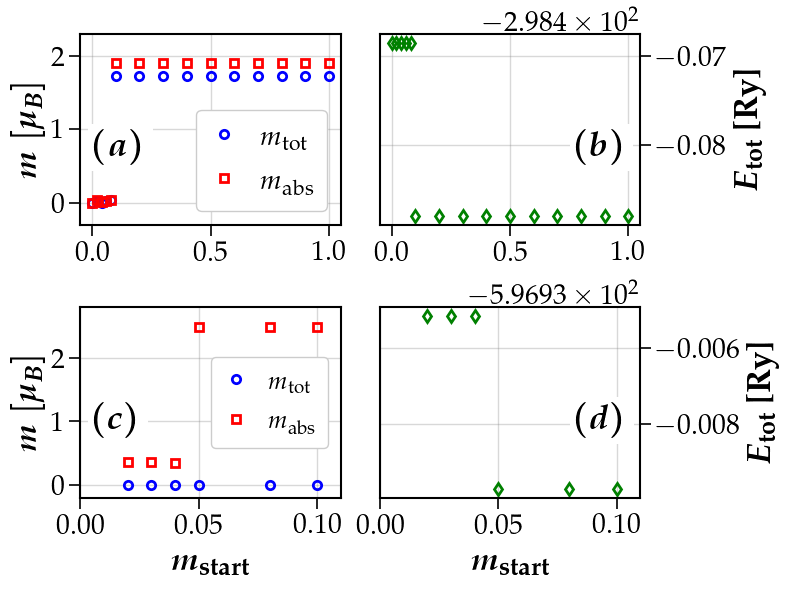

In [131]:
starting_magnetization = [1.0, 0.9, 0.8, 
                          0.7, 0.6, 0.5, 
                          0.4, 0.3, 0.2, 
                          0.1, 0.0, 0.02, 
                          0.04, 0.06, 0.08]

total_magnetization = [1.72, 1.72, 1.72, 
                       1.72, 1.72, 1.72, 
                       1.72, 1.72, 1.72, 
                       1.72, 0.00, 0.02,
                       -0.01, 0.02, 0.03]

absolute_magnetization = [1.90, 1.90, 1.90, 
                          1.90, 1.90, 1.90, 
                          1.90, 1.90, 1.90, 
                          1.90, 0.00, 0.03,
                          0.01, 0.02, 0.03]

total_energy = [-298.48807788, -298.48807788, -298.48807788, 
                -298.48807788, -298.48807788, -298.48807788, 
                -298.48807788, -298.48807788, -298.48807788, 
                -298.48807788, -298.46847745, -298.46847762,
                -298.46847747, -298.46847759, -298.46847765]


# AFM data
start_mag = [
    1.0, 0.9, 0.1,
    0.08, 0.05, 0.02, 
    0.03, 0.04
]
 

total_mag = [
    0.00, 0.00, 0.00,
    0.00, 0.00, 0.00,
    0.00, 0.00
]

absolute_mag = [
    2.49, 2.49, 2.49,
    2.49, 2.49, 0.36,
    0.36, 0.35
]

total_energy_afm = [
    -596.93970282, -596.93970282, -596.93970283,
    -596.93970282, -596.93970282, -596.93515044,
    -596.93515045, -596.93515046
]

fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].plot(starting_magnetization, total_magnetization, label=r'$m_{\rm tot}$', 
              markeredgewidth=2,
           color='blue', marker='o', markerfacecolor='none', linestyle='None')
ax[0, 0].plot(starting_magnetization, absolute_magnetization, label=r'$m_{\rm abs}$', 
                markeredgewidth=2,
           color='red', marker='s', markerfacecolor='none', linestyle='None')
ax[0, 0].set_ylabel(r'$\boldsymbol{m\;[\mu_B]}$')
ax[0, 0].set_ylim(-0.3, 2.3)
ax[0, 0].grid()
ax[0, 0].legend(loc='lower right', fontsize=20)

ax[0, 1].plot(starting_magnetization, total_energy, color='green', marker='d', markeredgewidth=2,
               markerfacecolor='none', linestyle='None')
ax[0, 1].set_ylabel(r'$\boldsymbol{E_{\rm tot}}$ $\textbf{[Ry]}$')
ax[0, 1].yaxis.tick_right()
ax[0, 1].yaxis.set_label_position("right")
ax[0, 1].grid()

ax[1, 0].plot(start_mag, total_mag, label=r'$m_{\rm tot}$', markeredgewidth=2,
              color='blue', marker='o', markerfacecolor='none', linestyle='None')
ax[1, 0].plot(start_mag, absolute_mag, label=r'$m_{\rm abs}$', markeredgewidth=2,
                color='red', marker='s', markerfacecolor='none', linestyle='None')
ax[1, 0].set_xlabel(r'$\boldsymbol{m_{\rm start}}$')
ax[1, 0].set_ylabel(r'$\boldsymbol{m\;[\mu_B]}$')
ax[1, 0].set_ylim(-0.2, 2.8)
ax[1, 0].grid()
ax[1, 0].legend(loc='center right', fontsize=18)
ax[1, 0].set_xlim(0, 0.11)

ax[1, 1].plot(start_mag, total_energy_afm, color='green', marker='d', markeredgewidth=2,
              markerfacecolor='none', linestyle='None')
ax[1, 1].set_xlabel(r'$\boldsymbol{m_{\rm start}}$')
ax[1, 1].set_ylabel(r'$\boldsymbol{E_{\rm tot}}$ $\textbf{[Ry]}$')
ax[1, 1].yaxis.tick_right()
ax[1, 1].yaxis.set_label_position("right")
ax[1, 1].grid()
ax[1, 1].set_xlim(0, 0.11)

# Add text annotations (a) (b), (c), (d)
ax[0, 0].text(0.05, 0.5, r'$\boldsymbol{(a)}$', transform=ax[0, 0].transAxes, fontsize=25,
              verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax[0, 1].text(0.75, 0.5, r'$\boldsymbol{(b)}$', transform=ax[0, 1].transAxes, fontsize=25,
                verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax[1, 0].text(0.05, 0.5, r'$\boldsymbol{(c)}$', transform=ax[1, 0].transAxes, fontsize=25,
                verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax[1, 1].text(0.75, 0.5, r'$\boldsymbol{(d)}$', transform=ax[1, 1].transAxes, fontsize=25,
                verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

plt.tight_layout()

plt.savefig("Figures/fig_magnetization_energy.pdf", bbox_inches='tight')

plt.show()

**Task**: *Have a look at the k-points meshes defined in the K POINTS card. Compare the mesh for the FCC and HCP structure; do the provided values make sense? Why? Are the K-meshes for HCP and FCC the same apart from folding, or do they have approximately the same density but not the same grid? How does this reflect on the convergence of your energy difference results?*

--- 

The k-point meshes have approximately the same density but differ in their specific grid shapes, which is expected due to the different symmetries of the lattices: FCC is isotropic while HCP is anisotropic (see details below).

Although the meshes are not identical, their similar k-point densities help ensure that total energies are sampled with comparable precision. This is important because a large mismatch in k-point density between the two structures could introduce a bias in the computed energy difference. By keeping the sampling densities similar, we ensure a consistent and reliable comparison between the total energies of FCC and HCP, which is crucial for the convergence of the energy difference.

--- 

First start by giving the shape of both crystals BZs. 

In reciprocal space, the Brillouin zone of the 2 crystals differ. The FCC lattice is isotropic whereas the HCP is not. We can compute the sampling density of both structures analytically
$$
\rho_{i} = V_{BZ, i}/n_{k,i} ,\quad i\in \{\text{FCC, HCP}\},
$$
and then compare the result.

**FCC**: 
- ibrav = 2 
- $k$-mesh: automatic `12 12 12 0 0 0`
- number of symmetrized $k$ points in output: 72
- Dense  grid: 8657 G-vectors FFT dimensions: (30, 30, 30)
- Smooth grid: 3119 G-vectors FFT dimensions: (24, 24, 24)

**HCP**:
- ibrav = 4
- $k$-mesh: automatic `12 12 6  0 0 0`
- number of symmetrized $k$ points in output: 76
- Dense  grid: 17141 G-vectors FFT dimensions: (30, 30, 48)
- Smooth grid: 6027 G-vectors FFT dimensions: (24, 24, 36)

**Task**: *Using PWscf, compute the energies for both HCP and FCC Co at the experimental lattice parameters by completing the input files in the Co fcc-fm and Co hcp-fm directories. Assume a ferromagnetic ordering for the two structures. Comment on the relative stability of the two phases. **Hint**: In comparing energies of different configurations, remember that the total energy is an extensive quantity!*

In Quantum Espresso, the number of atoms per cell for a HCP lattice is 2 while there is a single atom per cell for FCC. So, here we compare the two configurations by considering the energy per atom instead of the total cell energy. 

We find that $E_{fcc}-E_{hcp}\approx 21$ mRy meaning that the HCP configuration is more stable. 

Regarding magnetic properties, both structures have a similar total magnetization per atom $\approx 1.72 \mu_B$ indicating comparable ferromagnetic behavior. 

In [6]:
n_hcp = 2 # Number of atoms in HCP cell (see QE out file)
n_fcc = 1 # Number of atoms in FCC cell

E_hcp = -596.97834855 # Total energy of HCP unit cell
E_fcc = -298.46847765 # Total energy of FCC unit cell

total_mag_hcp = 3.43    # Bohr mag / cell
absolute_mag_hcp = 3.78 # Bohr mag / cell

total_mag_fcc = 1.72    # Bohr mag / cell
absolute_mag_fcc = 1.90 # Bohr mag / cell

E_hcp_per_atom = E_hcp / n_hcp
E_fcc_per_atom = E_fcc / n_fcc

print("E_hcp_per_atom = ", E_hcp_per_atom, " Ry")
print("E_fcc_per_atom = ", E_fcc_per_atom, " Ry")
print(f"Delta E = {E_fcc_per_atom - E_hcp_per_atom:.4f} Ry\n")
print(f"Total magnetization HCP = {total_mag_hcp:.2f} Bohr mag / cell")
print(f"Total magnetization FCC = {total_mag_fcc:.2f} Bohr mag / cell")
print(f"Total magnetization per atom HCP = {total_mag_hcp/n_hcp:.3f} Bohr mag / atom")
print(f"Total magnetization per atom FCC = {total_mag_fcc/n_fcc:.3f} Bohr mag / atom")

E_hcp_per_atom =  -298.489174275  Ry
E_fcc_per_atom =  -298.46847765  Ry
Delta E = 0.0207 Ry

Total magnetization HCP = 3.43 Bohr mag / cell
Total magnetization FCC = 1.72 Bohr mag / cell
Total magnetization per atom HCP = 1.715 Bohr mag / atom
Total magnetization per atom FCC = 1.720 Bohr mag / atom


## Magnetic configurations in HCP Cobalt

**Task**: *Perform a stability analysis for HCP cobalt in the ferromagnetic, antiferromagnetic, and nonmagnetic states, comparing their energies (per atom)*

- For AFM, we start by finding the appropriate `starting_magnetization`

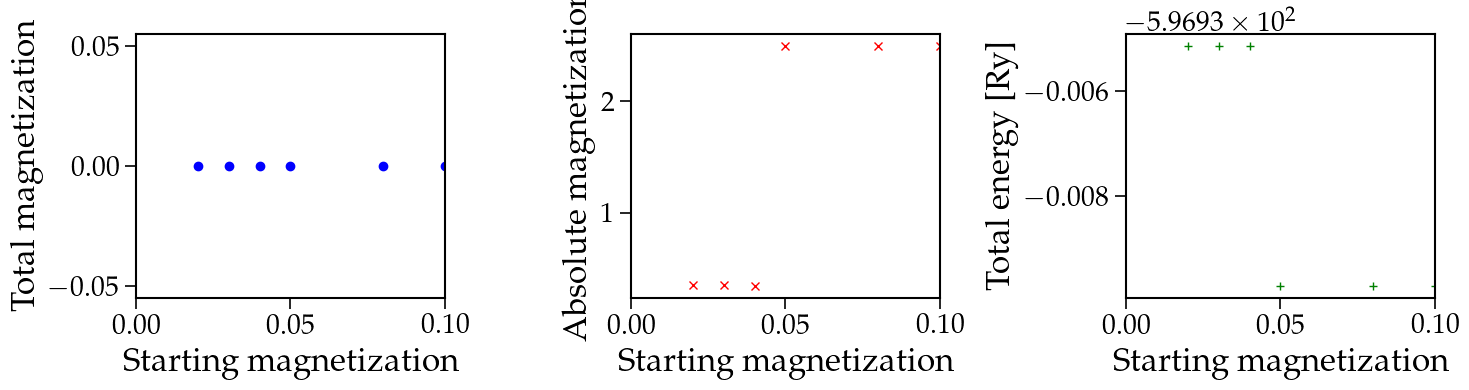

In [7]:
start_mag = [
    1.0, 0.9, 0.1,
    0.08, 0.05, 0.02, 
    0.03, 0.04
]
 

total_mag = [
    0.00, 0.00, 0.00,
    0.00, 0.00, 0.00,
    0.00, 0.00
]

absolute_mag = [
    2.49, 2.49, 2.49,
    2.49, 2.49, 0.36,
    0.36, 0.35
]

total_energy = [
    -596.93970282, -596.93970282, -596.93970283,
    -596.93970282, -596.93970282, -596.93515044,
    -596.93515045, -596.93515046
]

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
ax[0].plot(start_mag, total_mag, 'bo')
ax[0].set_xlabel('Starting magnetization')
ax[0].set_ylabel('Total magnetization')
ax[0].set_xlim(0, 0.1)
ax[1].plot(start_mag, absolute_mag, 'rx')
ax[1].set_xlabel('Starting magnetization')
ax[1].set_ylabel('Absolute magnetization')
ax[2].plot(start_mag, total_energy, 'g+')
ax[2].set_xlabel('Starting magnetization')
ax[2].set_ylabel('Total energy [Ry]')
plt.tight_layout()
plt.show()

Then, the stability analysis is conducted.

In [8]:
import pandas as pd

n_afm = 2
n_fm = 2 
n_nm = 2 

E_afm = -596.93970282 / n_afm
E_fm = -596.97834855 / n_fm
E_nm = -596.93517216 / n_nm
 
total_mag_afm = 0.00 / n_afm
total_mag_fm = 3.43 / n_fm
total_mag_nm = 0.00 / n_nm

absolute_mag_afm = 2.49 / n_afm
absolute_mag_fm = 3.78 / n_fm
absolute_mag_nm = 0.00 / n_nm

print(f"E_afm_per_atom = {E_afm:.4f} Ry")
print(f"E_fm_per_atom = {E_fm:.4f} Ry")
print(f"E_nm_per_atom = {E_nm:.4f} Ry")
print(f"Delta E (AFM - FM) = {E_afm - E_fm:.4f} Ry")
print(f"Delta E (AFM - NM) = {E_afm - E_nm:.4f} Ry")
print(f"Delta E (FM - NM) = {E_fm - E_nm:.4f} Ry\n")

print(f"Absolute magnetization AFM = {absolute_mag_afm:.2f} Bohr mag / atom")
print(f"Absolute magnetization FM = {absolute_mag_fm:.2f} Bohr mag / atom")
print(f"Absolute magnetization NM = {absolute_mag_nm:.2f} Bohr mag / atom")

E_afm_per_atom = -298.4699 Ry
E_fm_per_atom = -298.4892 Ry
E_nm_per_atom = -298.4676 Ry
Delta E (AFM - FM) = 0.0193 Ry
Delta E (AFM - NM) = -0.0023 Ry
Delta E (FM - NM) = -0.0216 Ry

Absolute magnetization AFM = 1.25 Bohr mag / atom
Absolute magnetization FM = 1.89 Bohr mag / atom
Absolute magnetization NM = 0.00 Bohr mag / atom


We observe the following hierarchy: 
$$
E_{\rm NM} > E_{\rm AFM} > E_{\rm FM}
$$
The energy difference between AFM and NM phases is approximately 10 times  smaller compared to that of AFM-FM and NM-FM. This means that the ferromagnetic phase is the most stable. 

Regarding magnetic properties, the absolute magnetization shows that both FM and AFM have local magnetic moments. 

**Task**: *For the FM and NM states, perform a non-self consistent calculation on a finer grid and compute the density of states. Do you see differences, and can you explain them? Try reverting the HCP FM starting magnetization and see how the DOS is affected. Do the changes make sense? Finally, is the material metallic in the FM, NM states, or both?*

- Finer grid: `18 18 9 0 0 0`
- A difference between the spin up and down DoS is clearly visible. It is expected from a ferromagnetic material. 
- Then we take `starting_magnetization(1)=-0.1`, with this the exact opposite spin DoS is observed. I.e. we also have a ferromagnetic material but all magnetic moments are reversed.
- Co is clearly metallic for both configuration as the DoS is not zero at the Fermi level.

In [9]:
# Define file paths and parameters
nm_dos_filepath = 'Co_hcp-nm/Co_hcp-nm.dos'
fm_dos_filepath = 'Co_hcp-fm/Co_hcp-fm.dos'
nm_fermi_energy = 18.092
fm_fermi_energy = 18.248
energy_min_crop = -8
energy_max_crop = 2

# Load and process Non-Magnetic DOS
nm_energy, nm_dos = load_and_process_nm_dos(
    filepath=nm_dos_filepath,
    fermi_energy=nm_fermi_energy,
    energy_min=energy_min_crop,
    energy_max=energy_max_crop
)

# Load and process Ferromagnetic DOS
fm_energy, fm_dos_up, fm_dos_down, int_dos_up, int_dos_down = load_and_process_fm_dos(
    filepath=fm_dos_filepath,
    fermi_energy=fm_fermi_energy,
    energy_min=energy_min_crop,
    energy_max=energy_max_crop
)

# Define plot limits (can be the same as crop limits)
energy_min_plot = energy_min_crop
energy_max_plot = energy_max_crop

# Recalculate fermi_idx for the standard FM case as it's used in cell b1b2f565
if fm_energy.size > 0:
    fermi_idx = np.abs(fm_energy).argmin()
else:
    fermi_idx = 0 # Or handle as an error / set to a value indicating no data
    print("Warning: fm_energy is empty, fermi_idx set to 0.")

Difference in integrated DOS at Fermi energy (↑ - ↓): 3.2951 states
This corresponds to a magnetic moment of 3.2951 Bohr magnetons per atom


c:\Users\celin\OneDrive\Bureau\MSE468_VM\lab3\exercise_3\utils.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(yticklabels)


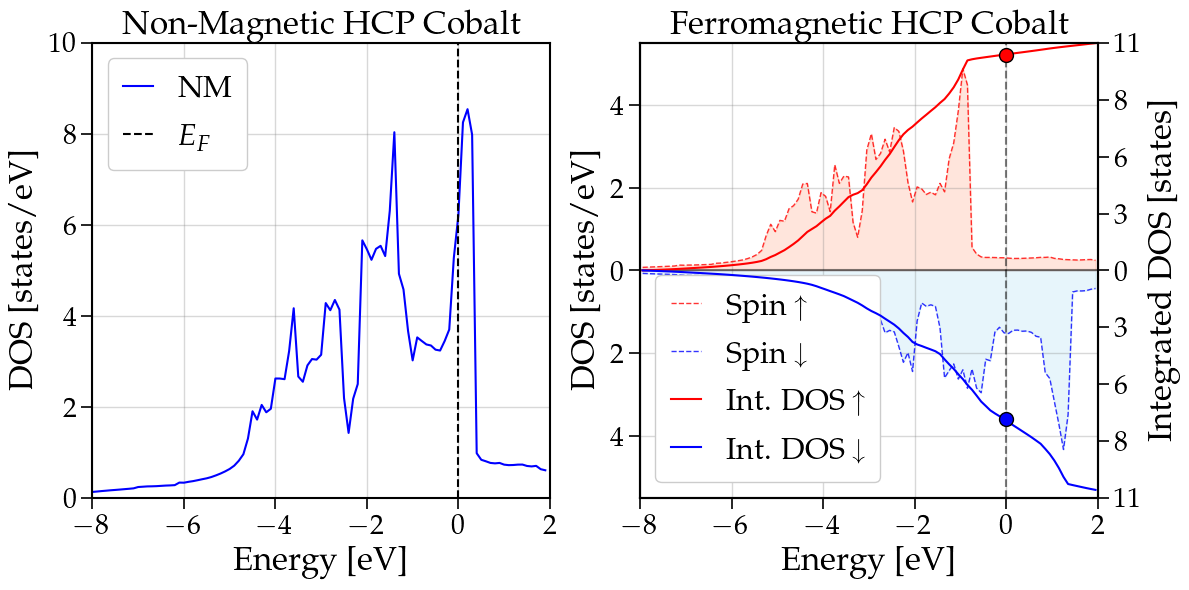

In [10]:
print(f"Difference in integrated DOS at Fermi energy (↑ - ↓): {int_dos_up[fermi_idx] + int_dos_down[fermi_idx]:.4f} states")
print(f"This corresponds to a magnetic moment of {int_dos_up[fermi_idx] + int_dos_down[fermi_idx]:.4f} Bohr magnetons per atom")

# Plot combined DOS for Non-Magnetic and Ferromagnetic cases
plot_combined_dos(
    nm_energy=nm_energy,
    nm_dos=nm_dos,
    fm_energy=fm_energy,
    fm_dos_up=fm_dos_up,
    fm_dos_down=fm_dos_down, 
    int_dos_up=int_dos_up,
    int_dos_down=int_dos_down,
    energy_min_plot=energy_min_plot,
    energy_max_plot=energy_max_plot,
)
plt.show()

In [11]:
# Reversed FM initialization
fm_reversed_dos_filepath = 'Co_hcp-fm/Co_hcp-fm-reversed.dos'
# Assuming fm_fermi_energy, energy_min_crop, energy_max_crop are the same as defined in the previous section 

# Load and process Ferromagnetic DOS (Reversed)
fm_energy_rev, fm_dos_up_rev, fm_dos_down_rev, int_dos_up_rev, int_dos_down_rev = load_and_process_fm_dos(
    filepath=fm_reversed_dos_filepath,
    fermi_energy=fm_fermi_energy, # Using fm_fermi_energy from the standard FM case
    energy_min=energy_min_crop,   # Using energy_min_crop from the standard FM case
    energy_max=energy_max_crop    # Using energy_max_crop from the standard FM case
)

# Recalculate fermi_idx for the reversed FM case (use a different variable name)
if fm_energy_rev.size > 0:
    fermi_idx_rev = np.abs(fm_energy_rev).argmin()
else:
    fermi_idx_rev = 0 # Or handle as an error / set to a value indicating no data
    print("Warning: fm_energy_rev is empty, fermi_idx_rev set to 0.")

Difference in integrated DOS at Fermi energy (↑ - ↓): 3.2951 states
This corresponds to a magnetic moment of 3.2951 Bohr magnetons per atom


c:\Users\celin\OneDrive\Bureau\MSE468_VM\lab3\exercise_3\utils.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(yticklabels)


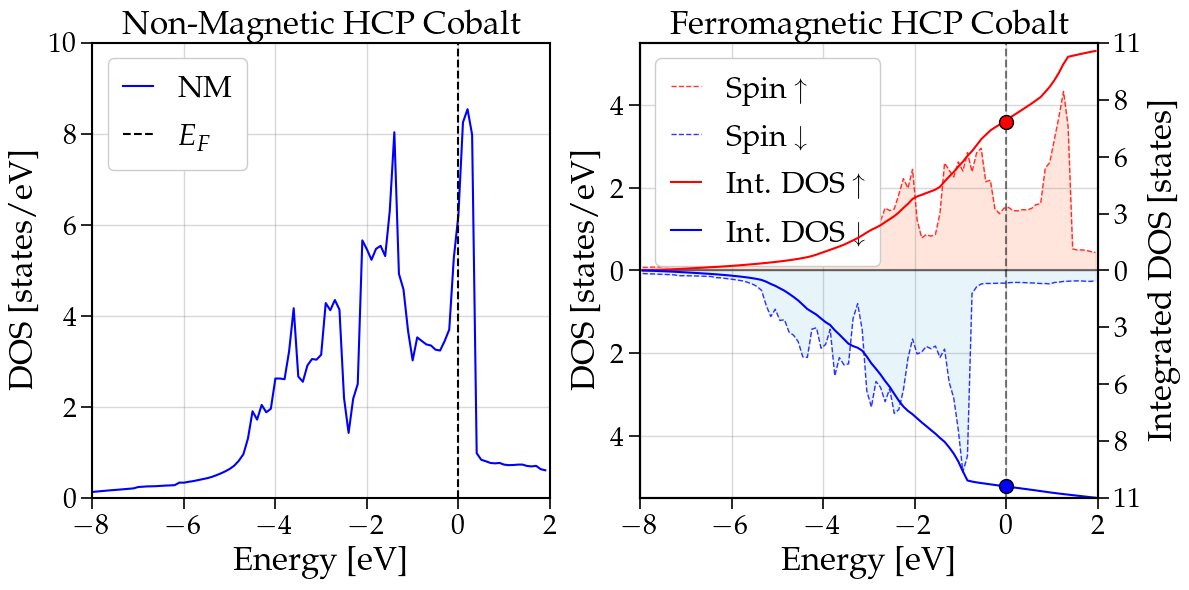

In [12]:
print(f"Difference in integrated DOS at Fermi energy (↑ - ↓): {int_dos_up[fermi_idx] + int_dos_down[fermi_idx]:.4f} states")
print(f"This corresponds to a magnetic moment of {int_dos_up[fermi_idx] + int_dos_down[fermi_idx]:.4f} Bohr magnetons per atom")

# Plot combined DOS for Non-Magnetic and Reversed Ferromagnetic cases
# nm_energy and nm_dos should be available from the first data processing cell's execution (e9a0617b)
plot_combined_dos(
    nm_energy=nm_energy, 
    nm_dos=nm_dos,       
    fm_energy=fm_energy_rev,
    fm_dos_up=fm_dos_up_rev,
    fm_dos_down=fm_dos_down_rev,
    int_dos_up=int_dos_up_rev,
    int_dos_down=int_dos_down_rev,
    energy_min_plot=energy_min_plot, # Using energy_min_plot from standard case
    energy_max_plot=energy_max_plot  # Using energy_max_plot from standard case
)
plt.show()

In [13]:
if 'fermi_idx_rev' in locals() and fm_energy_rev.size > 0 and fermi_idx_rev < len(int_dos_up_rev) and fermi_idx_rev < len(int_dos_down_rev):
    print(f"Difference in integrated DOS at Fermi energy (↑ - ↓): {int_dos_up_rev[fermi_idx_rev] + int_dos_down_rev[fermi_idx_rev]:.4f} states")
    print(f"This corresponds to a magnetic moment of {int_dos_up_rev[fermi_idx_rev] + int_dos_down_rev[fermi_idx_rev]:.4f} Bohr magnetons per atom")
else:
    print("Could not calculate difference for reversed FM: fermi_idx_rev or integrated DOS data not available or out of bounds.")

Difference in integrated DOS at Fermi energy (↑ - ↓): -3.2935 states
This corresponds to a magnetic moment of -3.2935 Bohr magnetons per atom


C:\Users\celin\AppData\Local\Temp\ipykernel_1684\752490569.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(yticklabels)
C:\Users\celin\AppData\Local\Temp\ipykernel_1684\752490569.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(yticklabels)


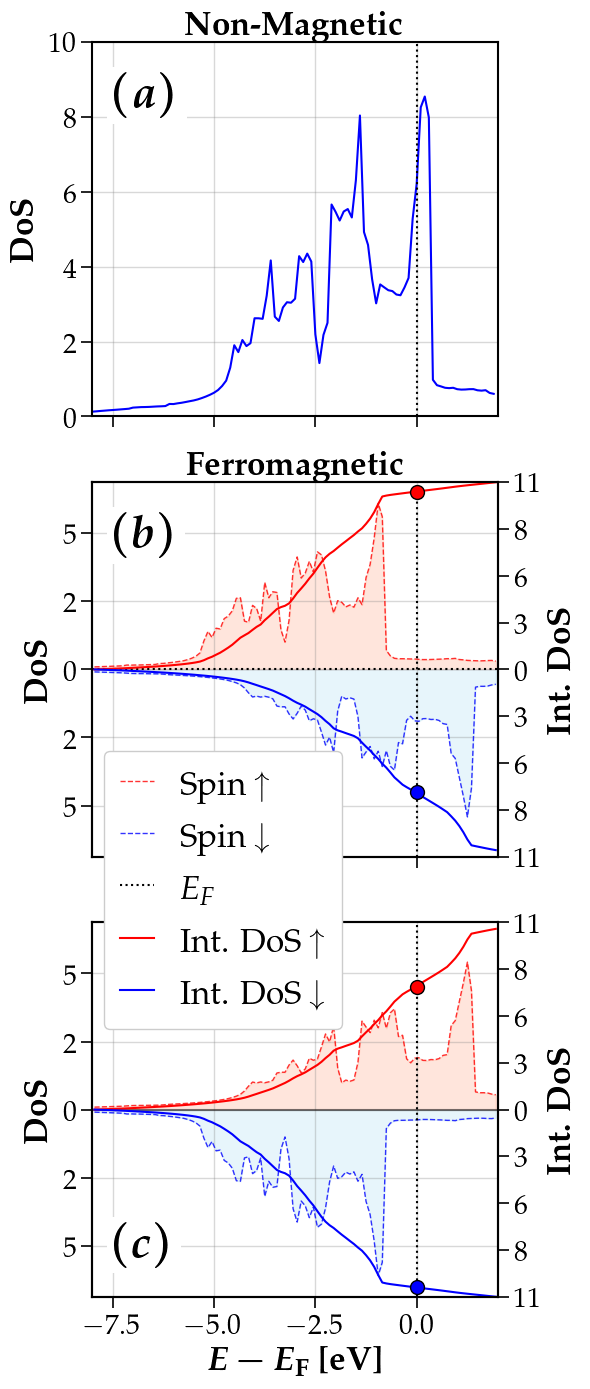

In [130]:
nm_ylim_max = 10
fm_ylim_abs_max = 5.5

fig, ax = plt.subplots(3, 1, figsize=(6, 14), sharex=True)
# Plot Non-Magnetic DOS

ax1 = ax[0]
ax1.plot(nm_energy, nm_dos, 'b-', label='NM')
ax1.axvline(x=0, color='k', linestyle=':', label=r'$E_F$')
ax1.set_ylabel(r'$\textbf{DoS}$')
ax1.set_title(r'$\textbf{Non-Magnetic}$')
ax1.grid(alpha=0.3)
ax1.set_ylim(0, nm_ylim_max)

ax2 = ax[1]
ax2.set_title(r'$\textbf{Ferromagnetic}$')
ax2.fill_between(fm_energy, fm_dos_up, color='coral', alpha=0.2)
ax2.plot(fm_energy, fm_dos_up, color='red', linestyle='--', label='Spin ↑', alpha=0.8, linewidth=1)
ax2.fill_between(fm_energy, fm_dos_down, color='skyblue', alpha=0.2) # fm_dos_down is already negative
ax2.plot(fm_energy, fm_dos_down, 'b--', label='Spin ↓', alpha=0.8, linewidth=1)
ax2.axhline(y=0, color='k', linestyle=':', alpha=1)
ax2.set_ylim(-fm_ylim_abs_max, fm_ylim_abs_max)
yticks = ax2.get_yticks()
yticklabels = [str(abs(int(y))) for y in yticks]
ax2.set_yticklabels(yticklabels)
ax2.set_ylabel(r'$\textbf{DoS}$')
ax2.grid(alpha=0.3)
ax2.set_xlim(energy_min_plot, energy_max_plot)
# Create a secondary y-axis for integrated DOS
ax2_twin = ax2.twinx()
ax2_twin.plot(fm_energy, int_dos_up, 'r-', label='Int. DoS ↑')
ax2_twin.plot(fm_energy, int_dos_down, 'b-', label='Int. DoS ↓') # int_dos_down is already negative or starts at 0
ax2_twin.set_ylabel(r'$\textbf{Int. DoS}$')
# Adjust y-limits for integrated DOS, ensuring symmetry around 0 if possible
max_abs_int_dos = 0
if len(int_dos_up) > 0:
    max_abs_int_dos = max(max_abs_int_dos, np.abs(int_dos_up).max())
if len(int_dos_down) > 0:
    max_abs_int_dos = max(max_abs_int_dos, np.abs(int_dos_down).max())

if max_abs_int_dos == 0: # Handle case with no integrated DOS data
    max_abs_int_dos = 1 # Default to avoid division by zero or empty plot
ax2_twin.set_ylim(-max_abs_int_dos, max_abs_int_dos)
tick_positions = np.linspace(-max_abs_int_dos, max_abs_int_dos, 9)
ax2_twin.set_yticks(tick_positions)
y_tick_labels_twin = []
for y_val in tick_positions:
    if abs(y_val) < 1e-3: # Check for values very close to zero
        y_tick_labels_twin.append("0")
    else:
        y_tick_labels_twin.append(str(abs(int(round(y_val)))))
ax2_twin.set_yticklabels(y_tick_labels_twin)
ax2.axvline(x=0, color='k', linestyle=':', alpha=1, label=r'$E_F$')
# Create combined legend # THIS LINE IS MODIFIED/REMOVED
# lines_1, labels_1 = ax2.get_legend_handles_labels()
# lines_2, labels_2 = ax2_twin.get_legend_handles_labels()
# ax2.legend(lines_1 + lines_2, labels_1 + labels_2, ncol=1, fontsize=20, bbox_to_anchor=(0, -0.5))
# Add a marker at the Fermi energy for both integrated DOS if data exists
if len(fm_energy) > 0:
    fermi_idx = np.abs(fm_energy).argmin()  # Index of the Fermi energy
    if fermi_idx < len(int_dos_up):
        ax2_twin.scatter(0, int_dos_up[fermi_idx], color='r', marker='o', s=100, 
                         zorder=5, edgecolor='black')
    if fermi_idx < len(int_dos_down):
        ax2_twin.scatter(0, int_dos_down[fermi_idx], color='b', marker='o', s=100, 
                         zorder=5, edgecolor='black')

# Plot Ferromagnetic DOS Reversed  
ax3 = ax[2] 
ax3.fill_between(fm_energy_rev, fm_dos_up_rev, color='coral', alpha=0.2)
ax3.plot(fm_energy_rev, fm_dos_up_rev, color='red', linestyle='--', label='DoS Spin ↑', alpha=0.8, linewidth=1)
ax3.fill_between(fm_energy_rev, fm_dos_down_rev, color='skyblue', alpha=0.2) # fm_dos_down is already negative
ax3.plot(fm_energy_rev, fm_dos_down_rev, 'b--', label='DoS Spin ↓', alpha=0.8, linewidth=1)
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax3.set_ylim(-fm_ylim_abs_max, fm_ylim_abs_max)
yticks = ax3.get_yticks()
yticklabels = [str(abs(int(y))) for y in yticks]
ax3.set_yticklabels(yticklabels)
ax3.set_ylabel(r'$\textbf{DoS}$')
ax3.grid(alpha=0.3)
ax3.set_xlim(energy_min_plot, energy_max_plot)
# Create a secondary y-axis for integrated DOS
ax3_twin = ax3.twinx()
ax3_twin.plot(fm_energy_rev, int_dos_up_rev, 'r-', label='Int. DoS ↑')
ax3_twin.plot(fm_energy_rev, int_dos_down_rev, 'b-', label='Int. DoS ↓') # int_dos_down is already negative or starts at 0
ax3_twin.set_ylabel(r'$\textbf{Int. DoS}$')
# Adjust y-limits for integrated DOS, ensuring symmetry around 0 if possible
max_abs_int_dos_rev = 0
if len(int_dos_up_rev) > 0:
    max_abs_int_dos_rev = max(max_abs_int_dos_rev, np.abs(int_dos_up_rev).max())
if len(int_dos_down_rev) > 0:
    max_abs_int_dos_rev = max(max_abs_int_dos_rev, np.abs(int_dos_down_rev).max())
if max_abs_int_dos_rev == 0: # Handle case with no integrated DOS data
    max_abs_int_dos_rev = 1 # Default to avoid division by zero or empty plot
ax3_twin.set_ylim(-max_abs_int_dos_rev, max_abs_int_dos_rev)
tick_positions_rev = np.linspace(-max_abs_int_dos_rev, max_abs_int_dos_rev, 9)
ax3_twin.set_yticks(tick_positions_rev)
y_tick_labels_twin_rev = []
for y_val in tick_positions_rev:
    if abs(y_val) < 1e-3: # Check for values very close to zero
        y_tick_labels_twin_rev.append("0")
    else:
        y_tick_labels_twin_rev.append(str(abs(int(round(y_val)))))
ax3_twin.set_yticklabels(y_tick_labels_twin_rev)
ax3.axvline(x=0, color='k', linestyle=':', alpha=1, label=r'$E_F$')
# Create combined legend # THIS LINE IS MODIFIED/REMOVED
# lines_3, labels_3 = ax3.get_legend_handles_labels()
# lines_4, labels_4 = ax3_twin.get_legend_handles_labels()
# ax3.legend(lines_3 + lines_4, labels_3 + labels_4, loc='lower left')
# Add a marker at the Fermi energy for both integrated DOS if data exists
if len(fm_energy_rev) > 0:
    fermi_idx_rev = np.abs(fm_energy_rev).argmin()  # Index of the Fermi energy (use distinct variable)
    if fermi_idx_rev < len(int_dos_up_rev):
        ax3_twin.scatter(0, int_dos_up_rev[fermi_idx_rev], color='r', marker='o', s=100, 
                        zorder=5, edgecolor='black')
    if fermi_idx_rev < len(int_dos_down_rev):
        ax3_twin.scatter(0, int_dos_down_rev[fermi_idx_rev], color='b', marker='o', s=100, 
                        zorder=5, edgecolor='black')

# Collect handles and labels for the common legend from ax2 and ax2_twin
# (ax3 and ax3_twin will have analogous items with the same labels)
unique_handles_map = {}
# From ax2 (ax[1])
handles_ax2, labels_ax2 = ax[1].get_legend_handles_labels()
for h, l in zip(handles_ax2, labels_ax2):
    if l not in unique_handles_map:
        unique_handles_map[l] = h
# From ax2_twin
handles_ax2_twin, labels_ax2_twin = ax2_twin.get_legend_handles_labels()
for h, l in zip(handles_ax2_twin, labels_ax2_twin):
    if l not in unique_handles_map:
        unique_handles_map[l] = h

common_handles = list(unique_handles_map.values())
common_labels = list(unique_handles_map.keys())

# Add the common legend to the figure, positioned between ax[1] (ax2) and ax[2] (ax3)
# The y-coordinate for bbox_to_anchor (0.34 here) is a fractional figure coordinate.
# It might need fine-tuning depending on the final layout.
# ncol=2 creates 3 rows for 6 items. fontsize can be adjusted.
fig.legend(common_handles, common_labels, loc='center', bbox_to_anchor=(0.38, 0.36), ncol=1, fontsize=24)

ax[2].set_xlabel(r'$\boldsymbol{E-E_{\rm F}}$ $\textbf{[eV]}$')

# Add text annotations (a), (b), (c)
ax[0].text(0.05, 0.92, r'$\boldsymbol{(a)}$', transform=ax[0].transAxes, fontsize=32,
           verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax[1].text(0.05, 0.92, r'$\boldsymbol{(b)}$', transform=ax[1].transAxes, fontsize=32,
              verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax[2].text(0.05, 0.20, r'$\boldsymbol{(c)}$', transform=ax[2].transAxes, fontsize=32,
                verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))


plt.tight_layout() # Adjust rect to prevent overlap with suptitle or make space for legend
plt.savefig("Figures/fig_dos_hcp_cobalt.pdf", bbox_inches='tight')
plt.show()